# Process Renovar CO Data according to reference station

## Constants and imports

In [3]:
input_data_directory = 'input/'
sensor_data_path = input_data_directory + 'alpha_co_concsensor_dataframe_1hr.csv'
reference_data_path = input_data_directory + 'ref_air_quality_data_Vila_Moema.csv'
reference_column_name = 'Monóxido de Carbono'

## Load Alphasense CO sensor data

In [4]:
import pandas as pd

sensor_data = pd.read_csv(sensor_data_path).sort_values(by='DateTime', ascending=True)
sensor_data.index = sensor_data['DateTime']
sensor_data = sensor_data.drop(columns='DateTime')
sensor_data

,latitude,longitude,measuring,Diff,value,Hour,Count,Std,% valid,Tag,GLOBAL_QTLE01,GLOBAL_QTLE99
DateTime,,,,,,,,,,,,
2022-11-20 13:30:00,-28.456899,-48.972999,125.92,NaN,0.144255,13,1,NaN,25.0,LOWSAMPLES,11.352500,2172.4600
2022-11-20 14:30:00,NaN,NaN,NaN,NaN,NaN,14,0,NaN,0.0,LOWSAMPLES,10.832500,2171.6100
2022-11-20 15:30:00,NaN,NaN,NaN,NaN,NaN,15,0,NaN,0.0,LOWSAMPLES,12.307500,2177.6800
2022-11-20 16:30:00,NaN,NaN,NaN,NaN,NaN,16,0,NaN,0.0,LOWSAMPLES,6.156667,2262.8825
2022-11-20 17:30:00,NaN,NaN,NaN,NaN,NaN,17,0,NaN,0.0,LOWSAMPLES,10.777500,2203.8625
...,...,...,...,...,...,...,...,...,...,...,...,...
2023-05-23 05:30:00,NaN,NaN,NaN,NaN,NaN,5,0,NaN,0.0,LOWSAMPLES,7.226667,2142.1250
2023-05-23 06:30:00,NaN,NaN,NaN,NaN,NaN,6,0,NaN,0.0,LOWSAMPLES,9.780000,2243.4700
2023-05-23 07:30:00,NaN,NaN,NaN,NaN,NaN,7,0,NaN,0.0,LOWSAMPLES,9.010000,2166.3250


## Load reference sensor data

In [5]:
import pandas as pd

reference_data = pd.read_csv(reference_data_path).sort_values(by='DateTime', ascending=True)
reference_data.index = reference_data['DateTime']
reference_data = reference_data.drop(columns='DateTime')[reference_column_name]
reference_data.head()

DateTime
2022-01-01 02:30:00    0.1467
2022-01-01 03:30:00    0.1544
2022-01-01 04:30:00    0.1167
2022-01-01 05:30:00    0.1079
2022-01-01 06:30:00    0.1154
Name: Monóxido de Carbono, dtype: float64

### Select period of interest according to CO sensor data

In [6]:
reference_data = reference_data[reference_data.index >= sensor_data.index[0]]
reference_data = reference_data[reference_data.index <= sensor_data.index[-1]]
reference_data

DateTime
2022-11-20 13:30:00    0.0102
2022-11-20 14:30:00    0.0042
2022-11-20 15:30:00    0.0030
2022-11-20 16:30:00    0.0028
2022-11-20 17:30:00    0.0024
                        ...  
2023-02-08 12:30:00    0.0990
2023-02-08 13:30:00    0.0892
2023-02-08 14:30:00    0.0893
2023-02-08 15:30:00    0.0748
2023-02-08 16:30:00       NaN
Name: Monóxido de Carbono, Length: 1924, dtype: float64

## Append reference column to CO sensor Data

In [7]:
sensor_data['reference'] = reference_data
sensor_data

,latitude,longitude,measuring,Diff,value,Hour,Count,Std,% valid,Tag,GLOBAL_QTLE01,GLOBAL_QTLE99,reference
DateTime,,,,,,,,,,,,,
2022-11-20 13:30:00,-28.456899,-48.972999,125.92,NaN,0.144255,13,1,NaN,25.0,LOWSAMPLES,11.352500,2172.4600,0.0102
2022-11-20 14:30:00,NaN,NaN,NaN,NaN,NaN,14,0,NaN,0.0,LOWSAMPLES,10.832500,2171.6100,0.0042
2022-11-20 15:30:00,NaN,NaN,NaN,NaN,NaN,15,0,NaN,0.0,LOWSAMPLES,12.307500,2177.6800,0.0030
2022-11-20 16:30:00,NaN,NaN,NaN,NaN,NaN,16,0,NaN,0.0,LOWSAMPLES,6.156667,2262.8825,0.0028
2022-11-20 17:30:00,NaN,NaN,NaN,NaN,NaN,17,0,NaN,0.0,LOWSAMPLES,10.777500,2203.8625,0.0024
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-05-23 05:30:00,NaN,NaN,NaN,NaN,NaN,5,0,NaN,0.0,LOWSAMPLES,7.226667,2142.1250,NaN
2023-05-23 06:30:00,NaN,NaN,NaN,NaN,NaN,6,0,NaN,0.0,LOWSAMPLES,9.780000,2243.4700,NaN
2023-05-23 07:30:00,NaN,NaN,NaN,NaN,NaN,7,0,NaN,0.0,LOWSAMPLES,9.010000,2166.3250,NaN


### Plot reference and sensor data

<Axes: xlabel='DateTime'>

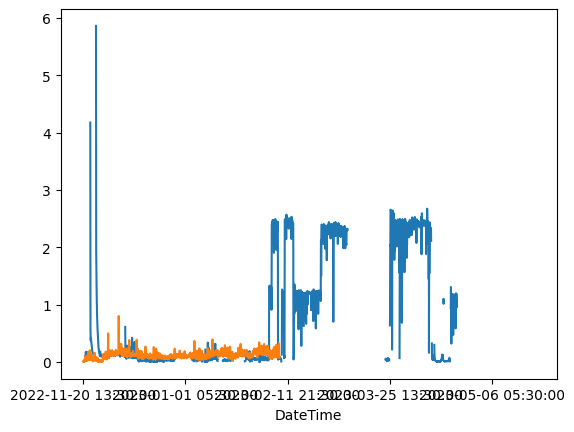

In [8]:
sensor_data['value'].plot()
sensor_data['reference'].plot()

## Separate reference data and valid sensor data

In [9]:
data = sensor_data[sensor_data.index <= reference_data.index[-1]][sensor_data['Tag'] == 'VALID'][['value', 'reference']]
data

/var/folders/wc/_83zcrx913j1dqwg4g90kbhh0000gp/T/ipykernel_7120/1722251259.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data = sensor_data[sensor_data.index <= reference_data.index[-1]][sensor_data['Tag'] == 'VALID'][['value', 'reference']]


,value,reference
DateTime,,
2022-11-21 11:30:00,0.088616,0.0446
2022-11-21 12:30:00,0.084772,0.0514
2022-11-21 13:30:00,0.075427,0.0407
2022-11-21 14:30:00,0.101650,0.0268
2022-11-21 15:30:00,0.170962,0.0374
...,...,...
2023-02-08 03:30:00,0.060351,0.1178
2023-02-08 04:30:00,0.061373,0.1118
2023-02-08 05:30:00,0.052194,0.1315


## Plot sensor vs. reference

Spearmans correlation coefficient: 0.054
Samples are uncorrelated (fail to reject H0) p=0.055
Kendall correlation coefficient: 0.054
Samples are uncorrelated (fail to reject H0) p=0.055


Text(0.05, 0.9, "Kendall's tau=0.045, p<0.05")

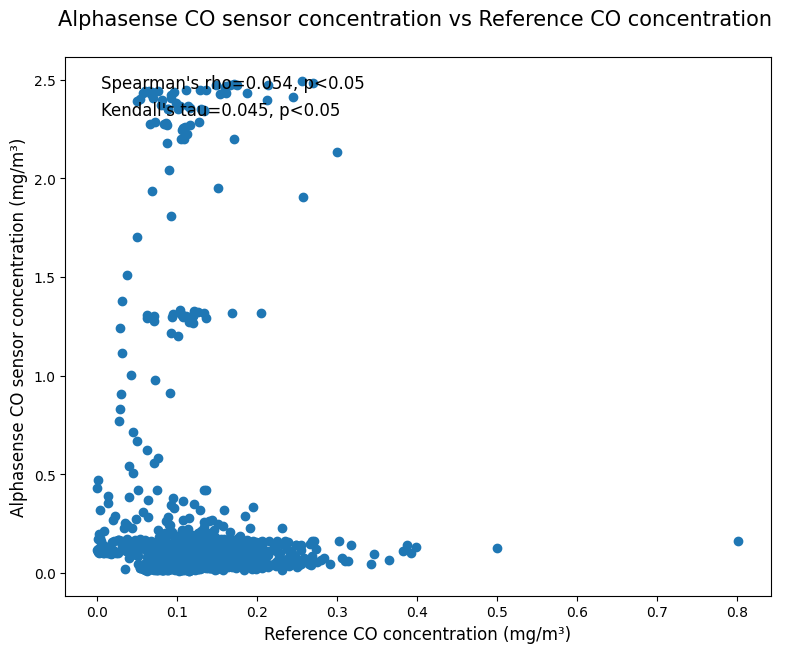

In [11]:
from scipy.stats import spearmanr
from scipy.stats import kendalltau
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(1.3*7,7))

plt.scatter(data['reference'], data['value'])
plt.title('Alphasense CO sensor concentration vs Reference CO concentration \n', 
          fontdict={'fontsize':15})
plt.xlabel('Reference CO concentration (mg/m\N{SUPERSCRIPT THREE})', 
           fontsize=12)
plt.ylabel('Alphasense CO sensor concentration (mg/m\N{SUPERSCRIPT THREE})', 
           fontsize=12)
coef, p = spearmanr(data['reference'], data['value'], 
                    nan_policy='omit')
print('Spearmans correlation coefficient: %.3f' % coef)
# interpret the significance
alpha = 0.05
if p > alpha:
	print('Samples are uncorrelated (fail to reject H0) p=%.3f' % p)
else:
	print('Samples are correlated (reject H0) p=%.3f' % p)

kendall, pken = kendalltau( data['reference'], data['value'], 
                            nan_policy='omit')
print('Kendall correlation coefficient: %.3f' % coef)
# interpret the significance
alpha = 0.05
if p > alpha:
	print('Samples are uncorrelated (fail to reject H0) p=%.3f' % p)
else:
	print('Samples are correlated (reject H0) p=%.3f' % p)
 
string = 'Spearman\'s rho=%.3f, p<0.05' % coef
plt.text(0.05, 0.95, string, horizontalalignment='left', fontsize=12,
         verticalalignment='center', transform=ax.transAxes)
string = 'Kendall\'s tau=%.3f, p<0.05' % kendall
plt.text(0.05, 0.90, string, horizontalalignment='left', fontsize=12,
         verticalalignment='center', transform=ax.transAxes)